## Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Import Data

In [2]:
df_customer = pd.read_csv('Case Study - Customer.csv', sep= ';')
df_product = pd.read_csv('Case Study - Product.csv', sep= ';')
df_store = pd.read_csv('Case Study - Store.csv', sep= ';')
df_transaction = pd.read_csv('Case Study - Transaction.csv', sep= ';')

In [3]:
print(df_customer)

     CustomerID  Age  Gender Marital Status Income,
0             1   55       1        Married    5,12
1             2   60       1        Married    6,23
2             3   32       1        Married    9,17
3             4   31       1        Married    4,87
4             5   58       1        Married    3,57
..          ...  ...     ...            ...     ...
442         443   33       1            NaN    9,28
443         444   53       0        Married   15,31
444         445   51       0        Married   14,48
445         446   57       0        Married    7,81
446         447   54       1        Married   20,37

[447 rows x 5 columns]


In [4]:
print(df_product)

  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200
5        P6         Cashew  18000
6        P7   Coffee Candy   9400
7        P8            Oat  16000
8        P9        Yoghurt  10000
9       P10   Cheese Stick  15000


In [5]:
print(df_store)

    StoreID         StoreName    GroupStore           Type   Latitude  \
0         1     Prima Tendean         Prima   Modern Trade       -6,2   
1         2  Prima Kelapa Dua         Prima   Modern Trade  -6,914864   
2         3        Prima Kota         Prima   Modern Trade  -7,797068   
3         4       Gita Ginara          Gita  General Trade  -6,966667   
4         5           Bonafid          Gita  General Trade  -7,250445   
5         6            Lingga        Lingga   Modern Trade  -5,135399   
6         7       Buana Indah         Buana  General Trade   3,316694   
7         8     Sinar Harapan  Harapan Baru  General Trade    5,54829   
8         9            Lingga        Lingga   Modern Trade  -3,654703   
9        10      Harapan Baru  Harapan Baru  General Trade   3,597031   
10       11     Sinar Harapan      Prestasi  General Trade   0,533505   
11       12    Prestasi Utama      Prestasi  General Trade  -2,990934   
12       13             Buana         Buana  Genera

In [6]:
print(df_transaction)

     TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0          TR11369         328  01/01/2022        P3   7500    4        30000   
1          TR16356         165  01/01/2022        P9  10000    7        70000   
2           TR1984         183  01/01/2022        P1   8800    4        35200   
3          TR35256         160  01/01/2022        P1   8800    7        61600   
4          TR41231         386  01/01/2022        P9  10000    1        10000   
...            ...         ...         ...       ...    ...  ...          ...   
5015       TR54423         243  31/12/2022       P10  15000    5        75000   
5016        TR5604         271  31/12/2022        P2   3200    4        12800   
5017       TR81224          52  31/12/2022        P7   9400    6        56400   
5018       TR85016          18  31/12/2022        P8  16000    3        48000   
5019       TR85684          55  31/12/2022        P8  16000    1        16000   

      StoreID  
0          

## Data Cleansing & Preparation

In [7]:
# Mengecek nilai-nilai yang hilang
missing_values1 = df_customer.isnull().sum()
missing_values2 = df_product.isnull().sum()
missing_values3 = df_store.isnull().sum()
missing_values4 = df_transaction.isnull().sum()

# Mengecek duplikat
duplicate_rows1 = df_customer.duplicated()
duplicate_rows2 = df_product.duplicated()
duplicate_rows3 = df_store.duplicated()
duplicate_rows4 = df_transaction.duplicated()

# Menampilkan statistik deskriptif untuk melihat ketidaksesuaian data
df_customer.describe()

,CustomerID,Age,Gender
count,447.000000,447.000000,447.000000
mean,224.000000,39.782998,0.458613
std,129.182042,12.848719,0.498842
min,1.000000,0.000000,0.000000
25%,112.500000,30.000000,0.000000
50%,224.000000,39.000000,0.000000
75%,335.500000,50.500000,1.000000
max,447.000000,72.000000,1.000000


In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  445 non-null    object
 4   Income,         447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [9]:
df_product.describe()

,Price
count,10.000000
mean,10410.000000
std,4890.455557
min,3200.000000
25%,7825.000000
50%,9700.000000
75%,14250.000000
max,18000.000000


In [10]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [11]:
df_store.describe()

,StoreID
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [12]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [13]:
df_transaction.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [14]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


## Menggabungkan Data

In [15]:
merged_data1 = pd.merge(df_customer, df_transaction, on='CustomerID')
merged_data2 = pd.merge(merged_data1, df_store, on='StoreID')
merged = pd.merge(merged_data2, df_product, on='ProductID')
merged.head()

,CustomerID,Age,Gender,Marital Status,"Income,",TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,1,55,1,Married,"5,12",TR54475,23/02/2022,P8,16000,1,16000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
1,5,58,1,Married,"3,57",TR53643,22/05/2022,P8,16000,3,48000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
2,7,31,0,Married,"4,57",TR5151,10/03/2022,P8,16000,2,32000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
3,19,24,1,Single,"4,14",TR98635,18/06/2022,P8,16000,1,16000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
4,28,55,0,Married,"6,8",TR9420,12/01/2022,P8,16000,3,48000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000


In [16]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      5020 non-null   int64 
 1   Age             5020 non-null   int64 
 2   Gender          5020 non-null   int64 
 3   Marital Status  4990 non-null   object
 4   Income,         5020 non-null   object
 5   TransactionID   5020 non-null   object
 6   Date            5020 non-null   object
 7   ProductID       5020 non-null   object
 8   Price_x         5020 non-null   int64 
 9   Qty             5020 non-null   int64 
 10  TotalAmount     5020 non-null   int64 
 11  StoreID         5020 non-null   int64 
 12  StoreName       5020 non-null   object
 13  GroupStore      5020 non-null   object
 14  Type            5020 non-null   object
 15  Latitude        5020 non-null   object
 16  Longitude       5020 non-null   object
 17  Product Name    5020 non-null   object
 18  Price_y 

In [17]:
merged.duplicated().sum()

0

## Membuat Model Regresi (Time Series)

In [18]:
# Mengubah tipe data tanggal ke format datetime
merged['Date'] = pd.to_datetime(merged['Date'])
merged['Longitude'] = merged['Longitude'].apply(lambda x: x.replace(',','.')).astype(float)
merged['Latitude'] = merged['Latitude'].apply(lambda x: x.replace(',','.')).astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_1548\949095664.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged['Date'] = pd.to_datetime(merged['Date'])


In [19]:
# Membuat Data Time Series
daily_data = merged.groupby('Date')['Qty'].sum().reset_index()

In [20]:
# Persiapan Data Time Series
data = daily_data.set_index('Date')
data2 = data.resample('D').sum()  # Resampling harian

In [21]:
data2.head()

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67


<Axes: xlabel='Date'>

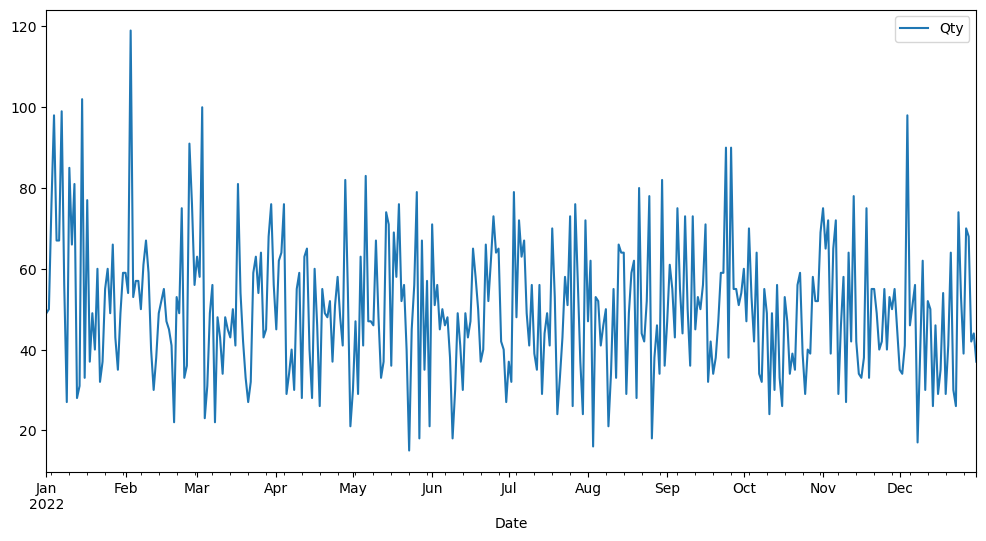

In [22]:
# Visualize Data
data2.plot(figsize=(12,6))

In [23]:
# Memisahkan Data
train_size = int(len(data2) * 0.8)
train_data, test_data = data2[:train_size], data2[train_size:]
print(train_data.shape, test_data.shape)

(292, 1) (73, 1)


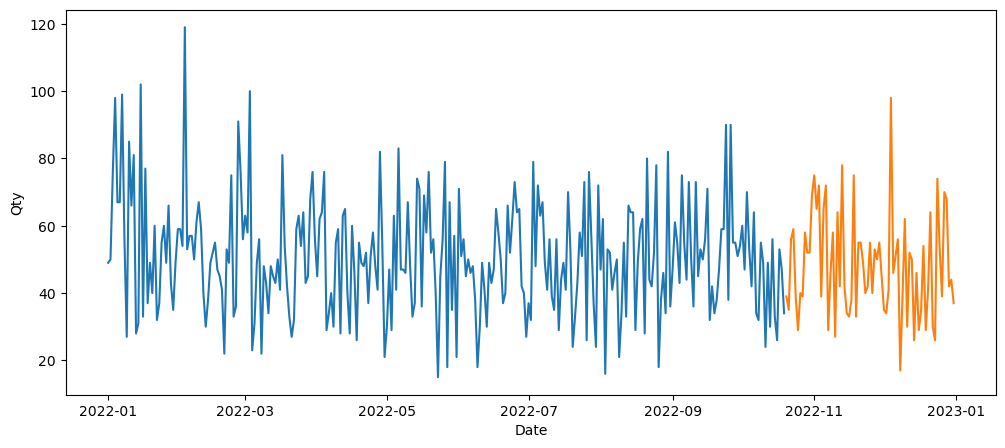

In [24]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'])
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'])
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Misalkan Anda sudah memiliki data time series pelatihan dalam 'train_data'

# Langkah 1: Tentukan nilai p, d, dan q
p = 2  # Order of Autoregression
d = 2  # Degree of Differencing
q = 2  # Order of Moving Average

# Langkah 2: Buat model ARIMA dengan parameter yang telah ditentukan
model = ARIMA(train_data, order=(p, d, q))

# Langkah 3: Latih model menggunakan data pelatihan
model_fit = model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

# Evaluasi performa
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 236.9200188377446


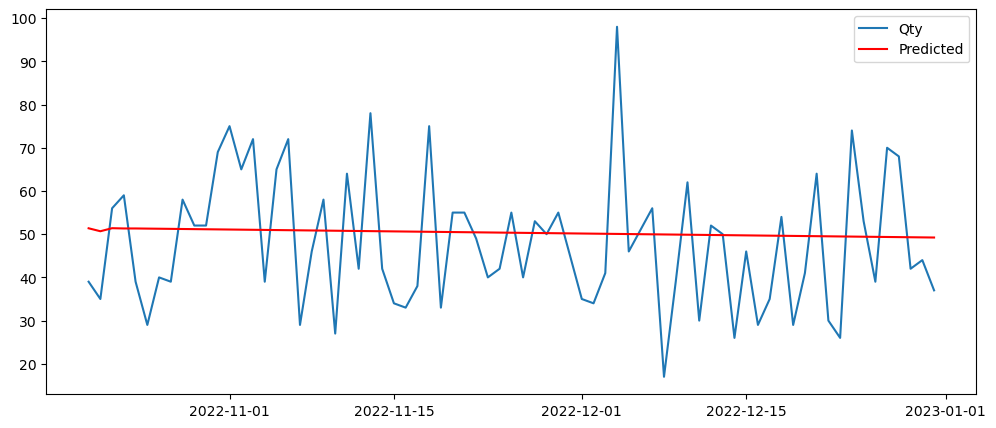

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test_data, label='Qty')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

## Machine Learning Clustering

In [35]:
# Menggabungkan data berdasarkan customerID dan menghitung metrik-metrik tertentu
aggregated = merged.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

aggregated

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [36]:
# Persiapan Data untuk Clustering
X = aggregated[['TransactionID', 'Qty', 'TotalAmount']]

In [56]:
# Menggunakan Metode Clustering KMeans
from sklearn.cluster import KMeans

# Membuat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan klastering pada data
aggregated_data['cluster'] = kmeans.fit_predict(X)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


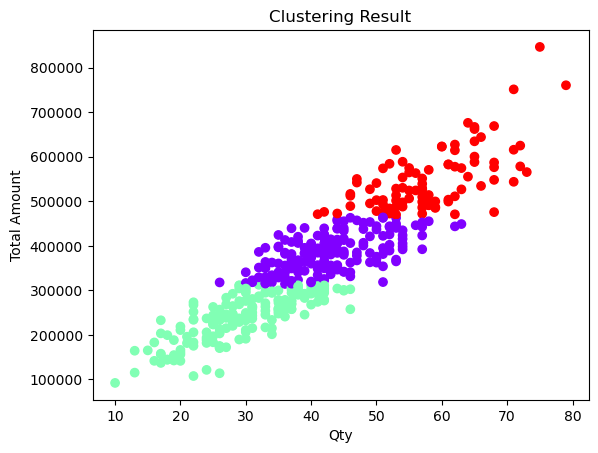

In [57]:
import matplotlib.pyplot as plt

plt.scatter(aggregated['Qty'], aggregated_data['TotalAmount'], c=aggregated_data['cluster'], cmap='rainbow')
plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Clustering Result')
plt.show()

In [85]:
# WCSS (Within-Cluster Sum of Squares) 
wcss= []
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model1.fit(X)
    wcss.append(model1.inertia_)
print(wcss)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

[6928031859602.739, 2434755241638.529, 1233416630536.0542, 776512017046.2603, 504081360603.5857, 382121220808.07764, 277934833180.125, 212853440612.76346, 171266010275.35165, 137780280512.41772]


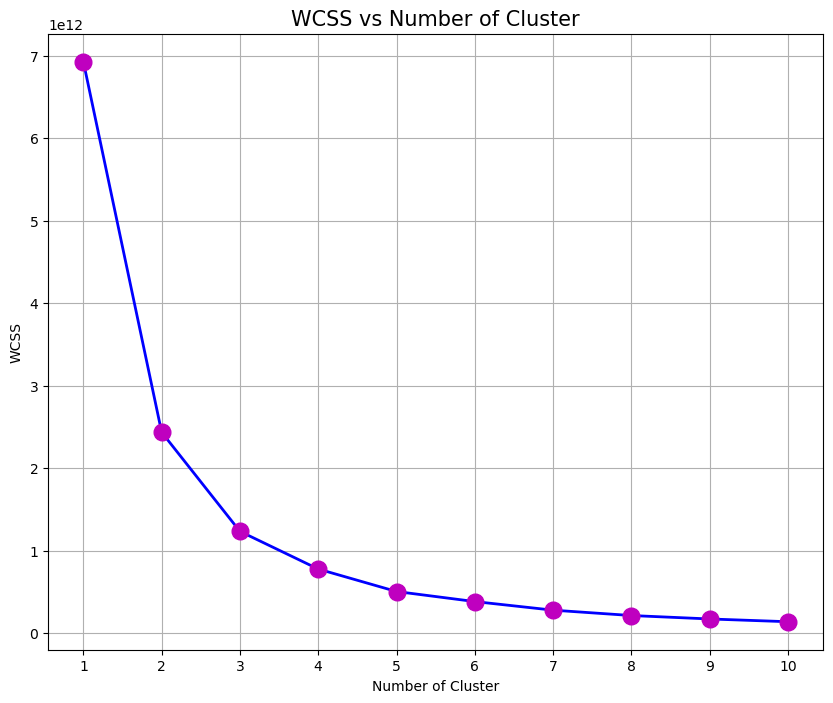

In [59]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,11)), wcss, color = 'blue', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'm', 
         markeredgecolor= 'm')
plt.title('WCSS vs Number of Cluster', fontsize = 15)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.grid()
plt.show()

In [78]:
# Membuat Model Clustering dengan K yang optimal
model1 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(X)
labels1=model1.labels_
centroids1 =model1.cluster_centers_

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [79]:
df_cluster = aggregated.drop(columns = ['CustomerID'])
df_cluster.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [80]:
# Masukin cluster ke dataset
df_cluster['cluster'] = model1.labels_
df_cluster.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,0
1,13,57,392300,2
2,15,56,446200,2
3,10,46,302500,1
4,7,27,268600,1


<Figure size 600x600 with 0 Axes>

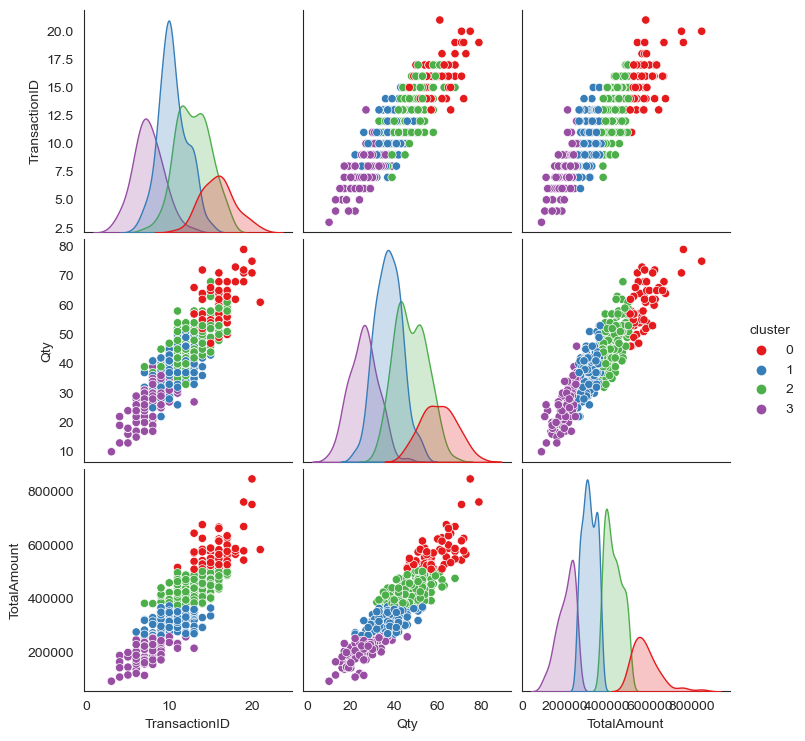

In [83]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster,hue='cluster',palette='Set1')
plt.show()

In [86]:
df_cluster['CustomerID'] = aggregated['CustomerID']
df_cluster_mean = df_cluster.groupby('cluster').agg({
    'CustomerID':'count',
    'TransactionID':'mean',
    'Qty':'mean',
    'TotalAmount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
1,152,10.414474,37.263158,316792.763158
2,140,12.871429,47.521429,431575.000000
3,98,7.448980,25.867347,206380.612245
0,57,15.877193,60.421053,583240.350877


## Kesimpulan

### Cluster 1 
- Cluster dengan jumlah pelanggan paling banyak.
- Karakteristik dari cluster ini adalah cluster menempati posisi ketiga dari setiap metrik (transaction, quantity, total amount).

Rekomendasi:
- Membangun hubungan baik dengan pelanggan.
- Melakukan survei untuk mengembangkan minat pelanggan terbanyak.

### Cluster 2
- Karakteristik pelanggan yang menempati posisi kedua tertinggi pada setiap metrik.

Rekomendasi:

- Memberikan promo secara rutin untuk meningkatkan transaksi.
- Melakukan peningkatan penjualan produk dengan harga tinggi.

### Cluster 3
- Karakteristik pelanggan dengan nilai terendah pada setiap metriknya.

Rekomendasi:

- Memberikan diskon yang signifikan untuk meningkatkan transaksi pelanggan.
- Menawarkan promo pada transaksi dengan jumlah barang yang lebih tinggi.
- Melakukan survei untuk mengidentifikasi potensi pengembangan produk.

### Cluster 0
- Cluster dengan jumlah pelanggan paling sedikit.
- Karakteristik pelanggan dengan nilai tertinggi pada setiap metriknya.

Rekomendasi:

- Menawarkan program promo loyalitas untuk mempertahankan transaksi.
- Melakukan survei kepuasan pelanggan.
- Mendorong peningkatan penjualan produk dengan harga lebih tinggi.